# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



In [ ]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_data = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_data['coord']['lat']
        city_lng = city_weather_data['coord']['lon']
        city_max_temp = city_weather_data['main']['temp_max']
        city_humidity = city_weather_data['main']['humidity']
        city_clouds = city_weather_data['clouds']['all']
        city_wind = city_weather_data['wind']['speed']
        city_country = city_weather_data['sys']['country']
        city_date = city_weather_data['dt']

        # Append the City information into city_data list
        city_data.append({
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Retrieval is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [ ]:
# Display sample data
city_data_df.head()

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/dreww/Desktop/DataAnalysisWork/Assignments/Starter_Code (2)/Starter_Code/output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/dreww/Desktop/DataAnalysisWork/Assignments/Starter_Code (2)/Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [ ]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temperature (°C)']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Save the figure
plt.savefig("C:/Users/dreww/Desktop/DataAnalysisWork/Assignments/Starter_Code (2)/Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [ ]:
# Build scatter plot for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("C:/Users/dreww/Desktop/DataAnalysisWork/Assignments/Starter_Code (2)/Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("C:/Users/dreww/Desktop/DataAnalysisWork/Assignments/Starter_Code (2)/Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("C:/Users/dreww/Desktop/DataAnalysisWork/Assignments/Starter_Code (2)/Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def linregression(x_values, y_values, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    # Create Plot
    regress_values = x_values * slope + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    # Label plot and annotate the line equation
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(x_values.mean(),y_values.mean()), fontsize=15, color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    return slope, intercept, rvalue, pvalue, stderr, line_eq

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
slope, intercept, rvalue, pvalue, stderr, line_eq = linregression(x_values, y_values, 'Latitude', 'Max Temperature (°C)')

plt.show()

In [ ]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
slope, intercept, rvalue, pvalue, stderr, line_eq = linregression(x_values, y_values, 'Latitude', 'Max Temperature (°C)')

plt.show()

**Discussion about the linear relationship: As seen by the linear regression plots coupled with the R values there is a distinct relationship between distance from the Equator. From the scatterplots we can see the farther away a city is from the equator the lower it's highest tempature will be. This means as you move further away from the equator cities will be colder. 

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
slope, intercept, rvalue, pvalue, stderr, line_eq = linregression(x_values, y_values, 'Latitude', 'Humidity')

plt.show()

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
slope, intercept, rvalue, pvalue, stderr, line_eq = linregression(x_values, y_values, 'Latitude', 'Humidity')

plt.show()

**Discussion about the linear relationship: As seen from the graphs there is no significant relationship between humidity and latitude this is further proven with extremely small correlation coefficients. 

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr, line_eq = linregression(x_values, y_values, 'Latitude', 'Cloudiness')

plt.show()

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr, line_eq = linregression(x_values, y_values, 'Latitude', 'Cloudiness')

plt.show()

**Discussion about the linear relationship: The relationship for cloudiness is similar to the case of Humidity above. Extremely small correlation coefficients point to no significant relationship between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.007916550307569034


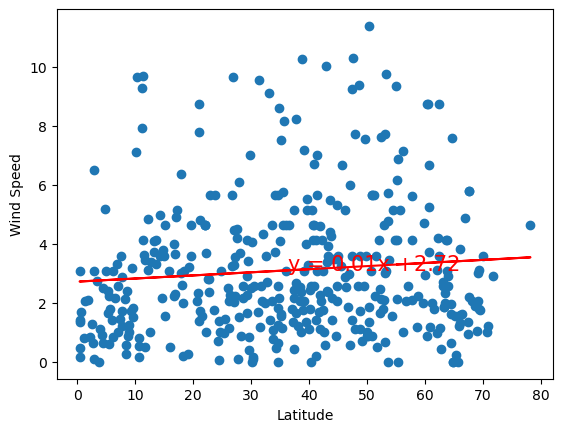

In [135]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
slope, intercept, rvalue, pvalue, stderr, line_eq = linregression(x_values, y_values, 'Latitude', 'Wind Speed')

plt.show()

The r-value is: 0.07099795967069258


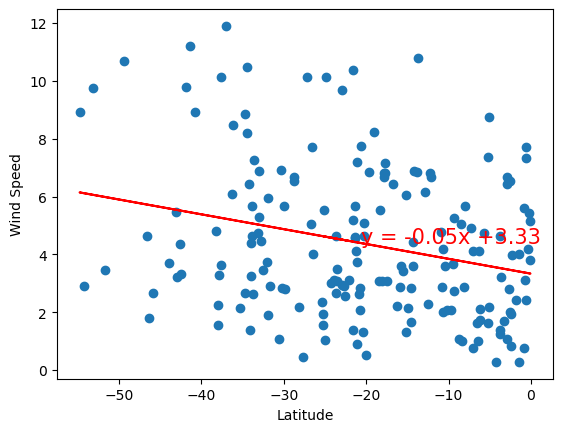

In [136]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
slope, intercept, rvalue, pvalue, stderr, line_eq = linregression(x_values, y_values, 'Latitude', 'Wind Speed')

plt.show()

**Discussion about the linear relationship: Finally, the relationship between wind speed and latitude is also statistically insignificant as we can see by the extremely small r-values. 